This Notebook Implements the Support vector machine in a classification problem using white wine dataset. This is diffrent from the wine dataset provided by Sklearn.dataset API. We will use fit a random model and then get the best model using hyper parameter tuning and also scale the input features.
It was a multiclass problem turned into a binary classification using binning of the target classes into good or bad wines. 

Importing necessary libraries

In [0]:
#Importing required packages.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline
from sklearn import datasets

In [24]:
from google.colab import files #comment if not using Colab
uploaded = files.upload() #comment if not using colab

Saving whitewines.csv to whitewines (1).csv


In [25]:
data= pd.read_csv("whitewines.csv") # loading data and checking first 20 rows.
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


Quality of wine is distributed from 3 to 9, where 3 is worst and 9 is best


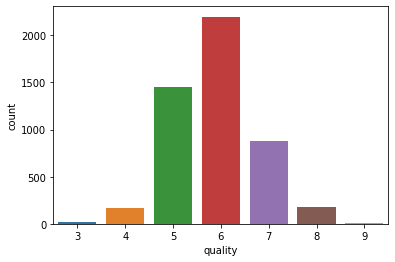

In [27]:
sns.countplot(data['quality']) # Creating countplot for the target variable.
data.quality.unique() # checking the classes in the target variable.

print("Quality of wine is distributed from 3 to 9, where 3 is worst and 9 is best")

In [28]:
data.info() #checking datatypes, null values and number of records

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [29]:
data.describe() #getting summary statistics of the numerical variables

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [32]:
data.corr()['quality'] #checking correlation of the target with input features.

fixed acidity          -0.113663
volatile acidity       -0.194723
citric acid            -0.009209
residual sugar         -0.097577
chlorides              -0.209934
free sulfur dioxide     0.008158
total sulfur dioxide   -0.174737
density                -0.307123
pH                      0.099427
sulphates               0.053678
alcohol                 0.435575
quality                 1.000000
Name: quality, dtype: float64

Observed no strong correlation in the data except alcohol and density features

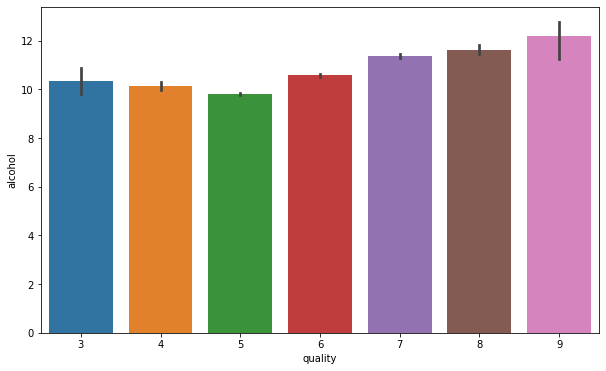

In [33]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = data) # See not so strong positive correlation between quality and alcohol

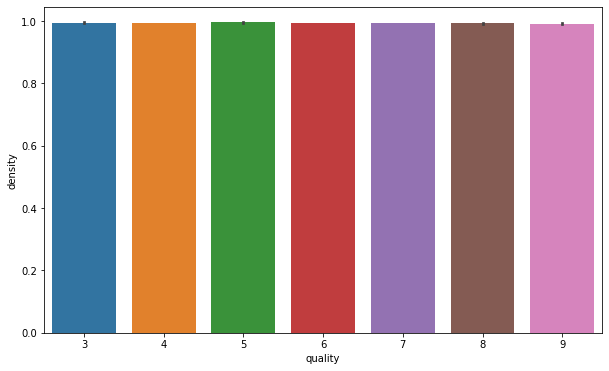

In [34]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'density', data = data) # See not so significant correlation between quality and density

In [0]:
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6.5, 9)
group_names = ['bad', 'good']
data['quality'] = pd.cut(data['quality'], bins = bins, labels = group_names)


In [0]:
#Now lets assign a labels to our quality variable
label_quality = LabelEncoder()

In [0]:
#Bad becomes 0 and good becomes 1 
data['quality'] = label_quality.fit_transform(data['quality'])

In [39]:
data.quality.value_counts() #double checking the count of quality

0    3838
1    1060
Name: quality, dtype: int64

In [0]:
X = data.drop('quality', axis = 1) #imput features
y = data['quality'] # target to be predicted

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 17) #splitting data into test and train

In [0]:
sc = StandardScaler()  #scaling data using standard scaling 
X_train = sc.fit_transform(X_train) # scaling input training features
X_test = sc.fit_transform(X_test) #scaling input test features

In [0]:
svc = SVC() # Creating object of Support vector classifier
svc.fit(X_train, y_train) # Fitting the data
y_pred = svc.predict(X_test) # prediction on test features

In [45]:
print(classification_report(y_test, y_pred)) #printing classification report 
print("Accuracy:",accuracy_score(y_test, y_pred)) #checking accuracy

              precision    recall  f1-score   support

           0       0.82      0.96      0.88       749
           1       0.70      0.31      0.43       231

    accuracy                           0.81       980
   macro avg       0.76      0.63      0.66       980
weighted avg       0.79      0.81      0.78       980

Accuracy: 0.8061224489795918


Hyper Parameter Tuning

In [0]:
#Finding best parameters for our SVC model
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)

In [47]:
grid_svc.fit(X_train, y_train) # Finding best parameters from grid, This will take upto 10 mins due to training lots of model on various parameters.

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [48]:
grid_svc.best_params_ # Checking the best parameters found

{'C': 1.4, 'gamma': 1.1, 'kernel': 'rbf'}

Training Model on the best parameter found using GridSearch.

In [51]:
svc2 = SVC(C = 1.2, gamma =  0.9, kernel= 'rbf')
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)
print(classification_report(y_test, pred_svc2)) 
print("Accuracy:",accuracy_score(y_test, y_pred)) #checking accuracy

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       749
           1       0.86      0.49      0.63       231

    accuracy                           0.86       980
   macro avg       0.86      0.73      0.77       980
weighted avg       0.86      0.86      0.85       980

Accuracy: 0.8061224489795918


Conclusion: The basic SVC model gave us accuracy of 80% but the model trained on best parameters gave us accuracy of same magnitude.